## 개요
* 사용한 데이터=https://www.data.go.kr/data/3035522/fileData.do
* 주택분양보증을 받아 분양한 전체 민간 신규아파트 분양가격 동향을 볼 수 있는 데이터
* 계속해서 상승하는 아파트의 가격을 파악하기 위해 데이터 선택

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

* 그래프 생성 시 한글 깨짐, 그래프 크기 설정

In [164]:
import matplotlib.font_manager as fm
font_location = "c:\windows\Fonts\GULIM.TTC"
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family=font_name)

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [3]:
df = pd.read_csv('주택도시보증공사_전국 신규 민간 아파트 분양가격 동향_20200331.csv')
df

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962
4588,제주,전용면적 85㎡초과 102㎡이하,2020,3,NaN


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
연도,4590.0,2017.5,1.343856,2015.0,2016.0,2017.5,2019.0,2020.0
월,4590.0,6.5,3.594368,1.0,3.0,6.5,10.0,12.0


* 데이터의 모양을 살펴봅니다.

In [5]:
df.shape

(4590, 5)

In [6]:
df.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)'], dtype='object')

* 컬럼명에 제곱미터가 컬럼명 입력 시 오류가 나서 컬럼명을 바꿉니다.

In [7]:
df.columns=['지역명','규모구분','연도','월','분양가격']

* 분양가격 널값을 처리합니다.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     4590 non-null   object
 1   규모구분    4590 non-null   object
 2   연도      4590 non-null   int64 
 3   월       4590 non-null   int64 
 4   분양가격    4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [9]:
df.isnull().sum()

지역명       0
규모구분      0
연도        0
월         0
분양가격    314
dtype: int64

In [10]:
df=df.dropna()
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4583,경남,전용면적 85㎡초과 102㎡이하,2020,3,3247
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4276 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     4276 non-null   object
 1   규모구분    4276 non-null   object
 2   연도      4276 non-null   int64 
 3   월       4276 non-null   int64 
 4   분양가격    4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 200.4+ KB


* 분양가격의 데이터타입을 바꿨습니다.

In [24]:
pd.to_numeric(df['분양가격'])

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4583    3247.0
4585    3955.0
4586    4039.0
4587    3962.0
4589    3601.0
Name: 분양가격, Length: 4276, dtype: float64

In [28]:
df.isnull().sum()

지역명      0
규모구분     0
연도       0
월        0
분양가격    16
dtype: int64

In [30]:
df=df.dropna()

In [36]:
df['분양가격'] = df['분양가격'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     4260 non-null   object
 1   규모구분    4260 non-null   object
 2   연도      4260 non-null   int64 
 3   월       4260 non-null   int64 
 4   분양가격    4260 non-null   int32 
dtypes: int32(1), int64(2), object(2)
memory usage: 183.0+ KB


In [39]:
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4583,경남,전용면적 85㎡초과 102㎡이하,2020,3,3247
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962


* 지역별, 연도별로 분양가격의 변동 그래프를 만들기 위해 전처리합니다.

In [49]:
df_all = df.loc[df['규모구분'] == '전체']
df_all

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
5,인천,전체,2015,10,3163
10,경기,전체,2015,10,3138
15,부산,전체,2015,10,3112
20,대구,전체,2015,10,2682
...,...,...,...,...,...
4565,전북,전체,2020,3,2468
4570,전남,전체,2020,3,2576
4575,경북,전체,2020,3,2555
4580,경남,전체,2020,3,2968


In [91]:
dfdf = df_all.drop(['규모구분','월'], axis =1)
dfdf

,지역명,연도,분양가격
0,서울,2015,5841
5,인천,2015,3163
10,경기,2015,3138
15,부산,2015,3112
20,대구,2015,2682
...,...,...,...
4565,전북,2020,2468
4570,전남,2020,2576
4575,경북,2020,2555
4580,경남,2020,2968


* 지역별 연도별 그래프입니다.

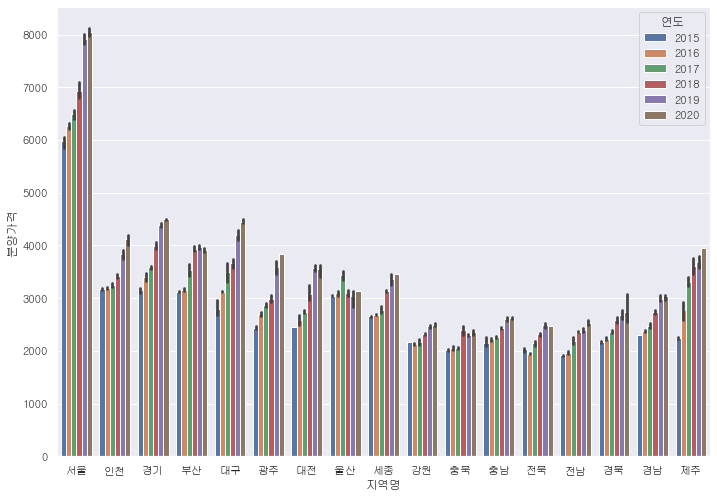

In [167]:
sns.barplot(x='지역명', y='분양가격',hue='연도', data= dfdf)
plt.show()

* 연도별 분양가격 추세선입니다.

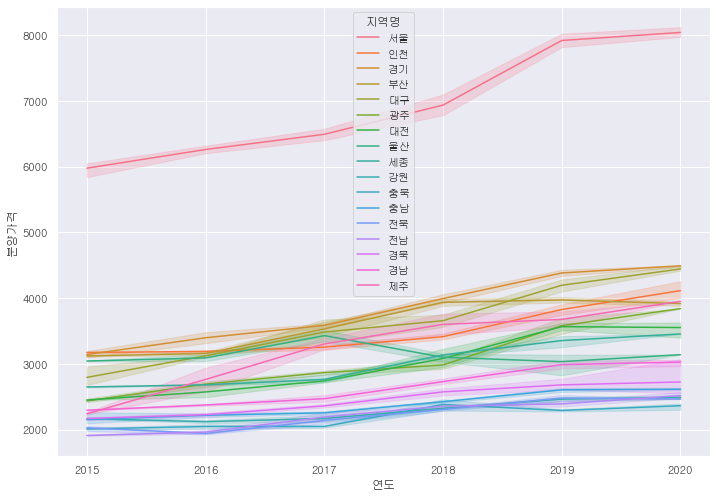

In [169]:
sns.lineplot(x='연도',y='분양가격',hue='지역명', data=dfdf)
plt.show()

* 서울의 규모구분별로 그래프를 그립니다.

In [140]:
df_seoul = df.loc[df['지역명'] == '서울']
df_seoul

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4505,서울,전체,2020,3,8029
4506,서울,전용면적 60㎡이하,2020,3,8533
4507,서울,전용면적 60㎡초과 85㎡이하,2020,3,8160
4508,서울,전용면적 85㎡초과 102㎡이하,2020,3,13835


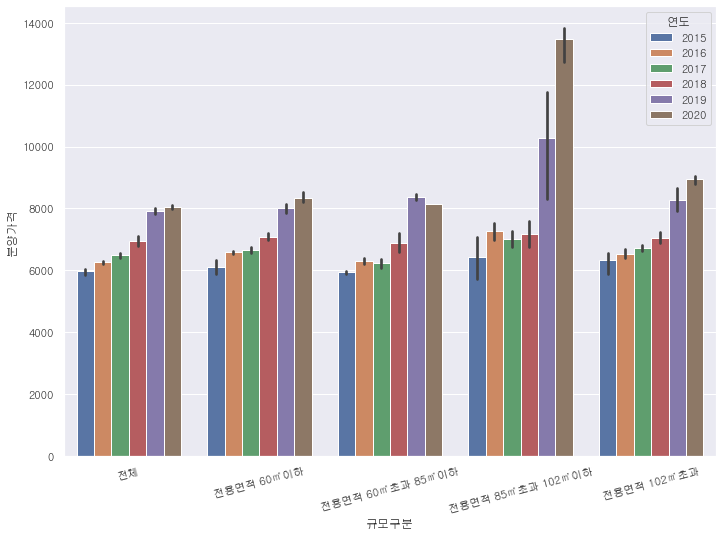

In [165]:
sns.barplot(x='규모구분', y='분양가격',hue='연도', data= df_seoul)
plt.xticks(rotation=15)
plt.show()

# 결과
* 서울지역의 분양가 상승세가 매우 가파르다.
* 또한 서울지역의 분야가는 기본적으로 다른 지역의 2배 이상이다.
* 울산과 충북의 상승세는 약간 주춤한다.
* 25평의 분양가 상승세가 높은 것으로 보인다.


# 해석

* 분양가는 계속해서 상승할 것으로 생각된다.
* 25평의 수요가 많은 것으로 판단된다.
* 서울 집 값이 너무 비싸다.
* 이 데이터 분석 자료를 활용하여 적절한 지역과 아파트 평수를 고를 때 참고할 수 있을 것이다.

# 후기

* 데이터형변환과 한글깨짐현상등 의외로 기본적인 것에서 힘들었습니다.